In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 800)

# Step 1. Read in Metadata CSV

In [4]:
covid_metadata = pd.read_csv('metadata.csv')

In [5]:
covid_metadata.shape

(950, 30)

In [6]:
covid_metadata.head(5)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. On January 25, he received supplemental oxygen through a nasal cannula at a rate of 5 liters per minute because of increasing dyspnea with hypoxemia. The partial pressure of oxygen was 57.2 mm...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. On January 25, he received supplemental oxygen through a nasal cannula at a rate of 5 liters per minute because of increasing dyspnea with hypoxemia. The partial pressure of oxygen was 57.2 mm...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had

In [7]:
covid_metadata.view.value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64

In [8]:
len(covid_metadata.patientid.unique())

472

## Step 2. Summarize the dataset

In [7]:
covid_metadata.describe()

,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,697.000000,713.000000,78.000000,119.000000,16.000000,28.000000,40.000000
mean,9.083214,53.534362,38.898718,78.475630,5.024375,5.307143,4.638050
std,31.664077,16.949007,6.494383,38.742573,2.660341,3.489956,20.550033
min,-360.000000,18.000000,36.000000,20.000000,0.220000,0.000000,0.400000
25%,1.000000,40.000000,37.800000,55.000000,3.067500,2.725000,0.746500
50%,5.000000,54.000000,38.150000,85.000000,4.745000,4.800000,1.100000
75%,10.000000,68.000000,38.975000,95.000000,6.857500,6.925000,1.600000
max,365.000000,94.000000,95.000000,340.000000,11.200000,12.900000,131.000000


## Step 3. Examine labels for COVID and re-map if necessary

In [9]:
covid_metadata.finding.value_counts()

Pneumonia/Viral/COVID-19                   584
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
No Finding                                  22
Tuberculosis                                18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Bacterial/Legionella              10
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Herpes                       3
Pneumonia/Viral/Influenza/H1N1               2
Pneumonia/Fun

In [10]:
len(covid_metadata.patientid.unique())

472

In [12]:
covid_metadata = covid_metadata.loc[~covid_metadata['finding'].isin(['todo', 'No Finding', 'Unknown'])]

In [13]:
len(covid_metadata.patientid.unique())

446

In [14]:
covid_metadata.loc[covid_metadata['finding'] == "Pneumonia/Viral/COVID-19", 'is_covid'] = 1
covid_metadata.loc[covid_metadata['finding'] != "Pneumonia/Viral/COVID-19", 'is_covid'] = 0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [15]:
covid_metadata.is_covid.value_counts()

1.0    584
0.0    260
Name: is_covid, dtype: int64

## Step 4. Examine unique patient records (de-dupe rows with multiple images per patient)

In [16]:
unique_cases = covid_metadata.drop_duplicates(subset='patientid')

In [17]:
unique_cases.shape

(446, 31)

In [18]:
unique_cases

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29,is_covid
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc2001272,NaN,"On January 22, 2020, a 65-year-old man with a history of hypertension, type 2 diabetes, coronary heart disease for which a stent had been implanted, and lung cancer was admitted to the emergency department of Cho Ray Hospital, the referral hospital in Ho Chi Minh City, for low-grade fever and fatigue. He had become ill with fever on January 17, a total of 4 days after he and his wife had flown to Hanoi from the Wuchang district in Wuhan, where outbreaks of 2019-nCoV were occurring. He reported that he had not been exposed to a “wet market” (a market where dead and live animals are sold) in Wuhan. Chest radiographs obtained on admission showed an infiltrate in the upper lobe of the left lung",NaN,NaN,1.0
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Taiwan",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc2001573,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN,1.0
6,5,NaN,NaN,NaN,Pneumonia,NaN,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2017,NaN,images,ARDSSevere.png,NaN,https://en.wikipedia.org/wiki/File:ARDSSevere.png,CC BY-SA,Severe ARDS. Person is intubated with an OG in place.,NaN,NaN,0.0
7,6,0.0,NaN,NaN,Pneumonia/Viral/COVID-19,Y,NaN,Y,Y,Y,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 6, 2020","Wuhan Jinyintan Hospital, Wuhan, Hubei Province, China",images,lancet-case2a.jpg,10.1016/S0140-6736(20)30211-7,https://www.thelancet.com/journals/lancet/article/PIIS0140-6736%2820%2930211-7/fulltext,NaN,"Case 2: chest x-ray obtained on Jan 6 (2A). The brightness of both lungs was decreased and multiple patchy shadows were observed; edges were blurred, and large ground-glass opacity and condensation shadows were mainly on the lower right lobe. Tracheal intubation could be seen in the trachea. Heart shadow roughly presents in the normal range. On the left side, the diaphragmatic surface is not clearly displayed. The right side of the diaphragmatic surface was light and smooth and rib phrenic angle was less sharp. Chest x-ray on Jan 10 showed worse status (2B)",NaN,NaN,1.0
9,3,4.0,M,74.0,Pneumonia/Viral/SARS,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,38.0,NaN,NaN,NaN,NaN,AP,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,SARS in a 74-year-old man who developed symptoms 4 days after exposure. Initial anteroposterior chest radiograph shows bilateral airspace disease that is more extensive in the left lung.,NaN,NaN,0.0
12,7,7.0,F,29.0,Pneumonia/Viral/SARS,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg,10.1148/rg.242035193,https://pubs.rsna.org/doi/10.1148/rg.242035193,NaN,"SARS in a 29-year-old woman who presented 7 days after exposure. (a) Posteroanterior radiograph depicts a subtle focus of consolidation in the right lower zone, partly obscured by breast tissue.",NaN,NaN,0.0
14,8,9.0,F,42.0,Pneumonia/Viral/SARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,2004,"Mount Sinai Hospital, Toronto, Ontario, Canada",images,SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg,10.1148/rg.24203519

## Step 5. Gender distribution of dataset, breakdown by COVID incidence

<AxesSubplot:>

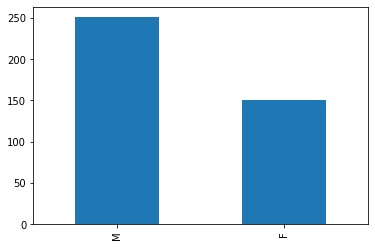

In [30]:
unique_cases['sex'].value_counts().plot(kind='bar')

In [40]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

Text(0, 0.5, 'Count of cases')

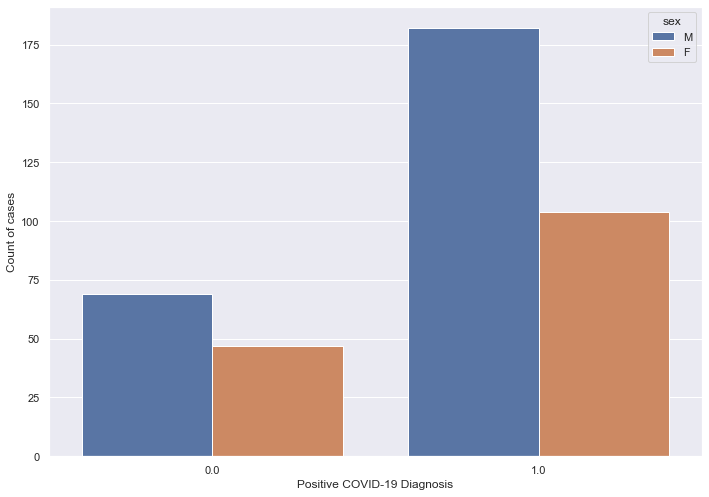

In [44]:
sns.countplot(data=unique_cases,x='is_covid',hue='sex')
plt.xlabel("Positive COVID-19 Diagnosis") 
plt.ylabel("Count of cases")

<AxesSubplot:>

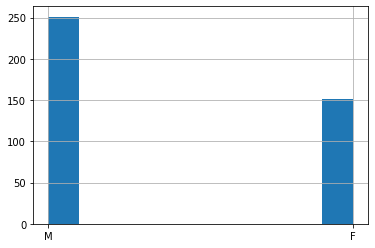

In [26]:
unique_cases.sex.hist()

<AxesSubplot:ylabel='sex,is_covid'>

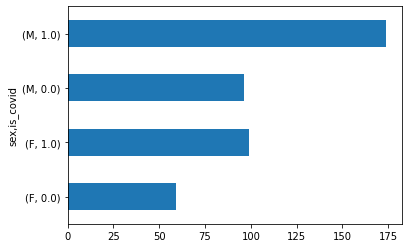

In [26]:
unique_cases.groupby(['sex', 'is_covid']).size().plot(kind='barh') 

## Step 6. Age distribution, breakdown by COVID incidence

<AxesSubplot:>

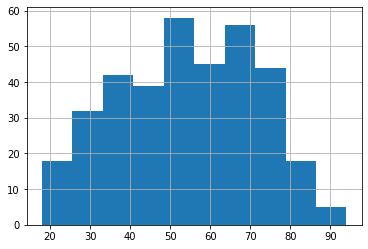

In [29]:
unique_cases.age.hist()

Text(0.5, 0, 'Patient Age')

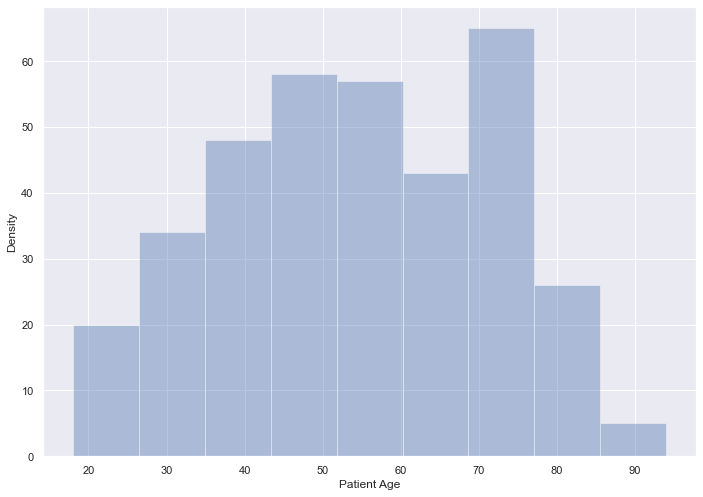

In [54]:
sns.distplot(unique_cases.age, kde=False,
 color="b")
plt.ylabel("Density") 
plt.xlabel("Patient Age")

Text(0.5, 0, 'Patient Age')

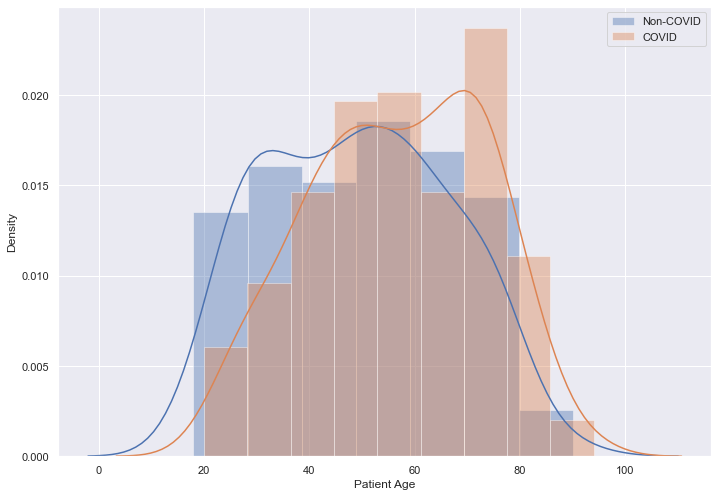

In [68]:
unique_cases.groupby('is_covid')['age'].apply(sns.distplot, hist=True);
plt.ylabel("Density") 
plt.legend(['Non-COVID', 'COVID'])
plt.xlabel("Patient Age")

array([<AxesSubplot:title={'center':'0.0'}>,
       <AxesSubplot:title={'center':'1.0'}>], dtype=object)

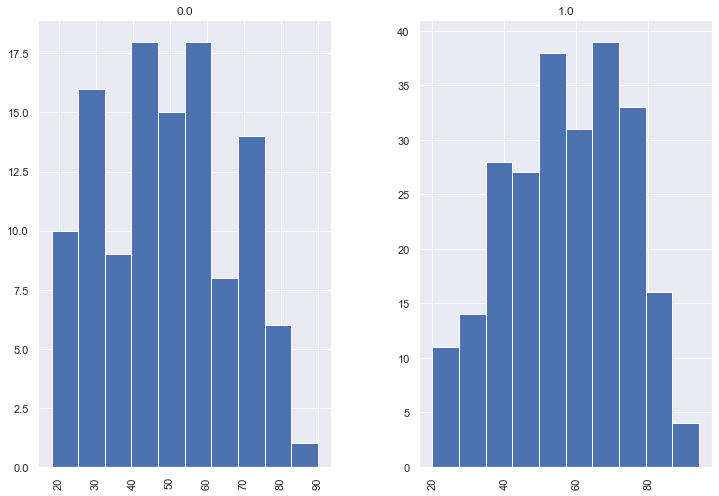

In [69]:
unique_cases['age'].hist(by=unique_cases['is_covid'])

array([[<AxesSubplot:title={'center':'0.0'}>,
        <AxesSubplot:title={'center':'1.0'}>]], dtype=object)

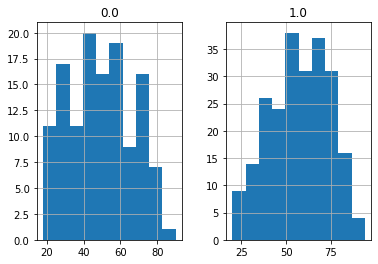

In [38]:
unique_cases.reset_index().pivot('index','is_covid','age').hist()

In [71]:
unique_cases.groupby('is_covid')['age'].mean()

is_covid
0.0    49.139130
1.0    56.871369
Name: age, dtype: float64

## Step 7. Offset (number of days it took to present at hospital), breakdown by COVID incidence

Text(0.5, 0, 'Patient is COVID-positive')

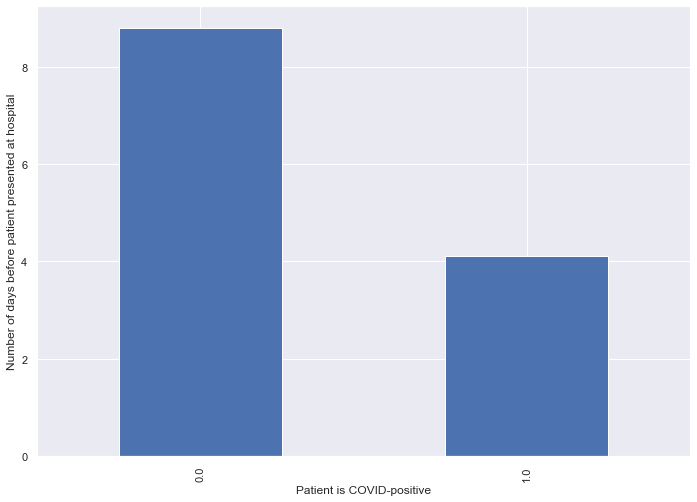

In [82]:
unique_cases.groupby('is_covid')['offset'].mean().plot(kind='bar')
plt.ylabel("Number of days before patient presented at hospital") 
plt.xlabel("Patient is COVID-positive")

## Step 8. Survival distribution, breakdown by COVID

In [87]:
unique_cases.survival.value_counts()

Y    95
N    25
Name: survival, dtype: int64

Text(0.5, 0, 'Patient is COVID-positive')

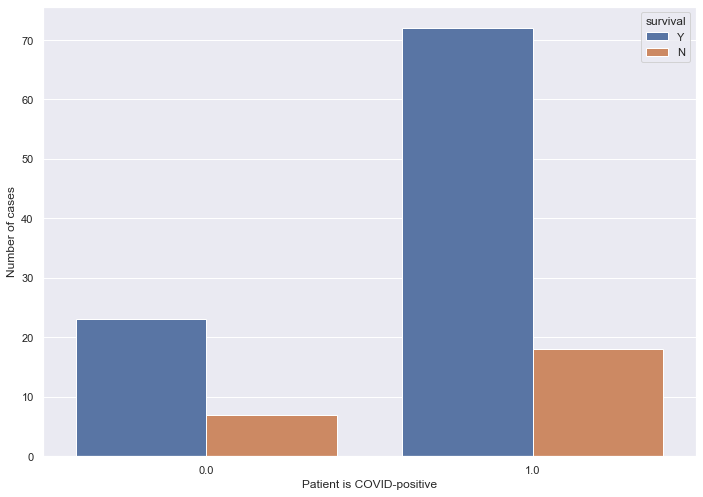

In [84]:
sns.countplot(data=unique_cases,x='is_covid',hue='survival')
plt.ylabel("Number of cases") 
plt.xlabel("Patient is COVID-positive")

## Step 9. Location of cases

In [49]:
unique_cases.location.value_counts()

Hannover Medical School, Hannover, Germany                                         71
Italy                                                                              51
Melbourne, Australia                                                               27
United Kingdom                                                                     13
Hong Kong                                                                          12
Wenzhou, China                                                                     10
Spain                                                                               8
Brescia, Italy                                                                      7
Humanitas Clinical and Research Hospital, Rozzano, Milan, Italy                     6
Nottingham, United Kingdom                                                          6
Wuhan, China                                                                        5
Mount Sinai Hospital, Toronto, Ontario, Canada        

## Step 10. Peek at clinical notes

In [58]:
unique_cases.clinical_notes.sample()

924    Shortness of breath, fever and rigors Opacity projected behind the heart on the PA radiograph with loss of visualization of the left hemidiaphragm consistent with collapse / consolidation throughout the left lower lobe.  Small focus of linear atelectasis in the left costophrenic recess region.  Right lung and pleural space are clear.  Normal cardiomediastinal contour.  Cholecystectomy clips noted. Typical chest radiograph appearance of left lower lobe pneumonia with collapse / consolidation.
Name: clinical_notes, dtype: object

## Next Steps: Image analysis

In [62]:
covid_metadata.view.value_counts()

PA           344
AP Supine    234
AP           203
L             84
Axial         68
Coronal       16
AP Erect       1
Name: view, dtype: int64